,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


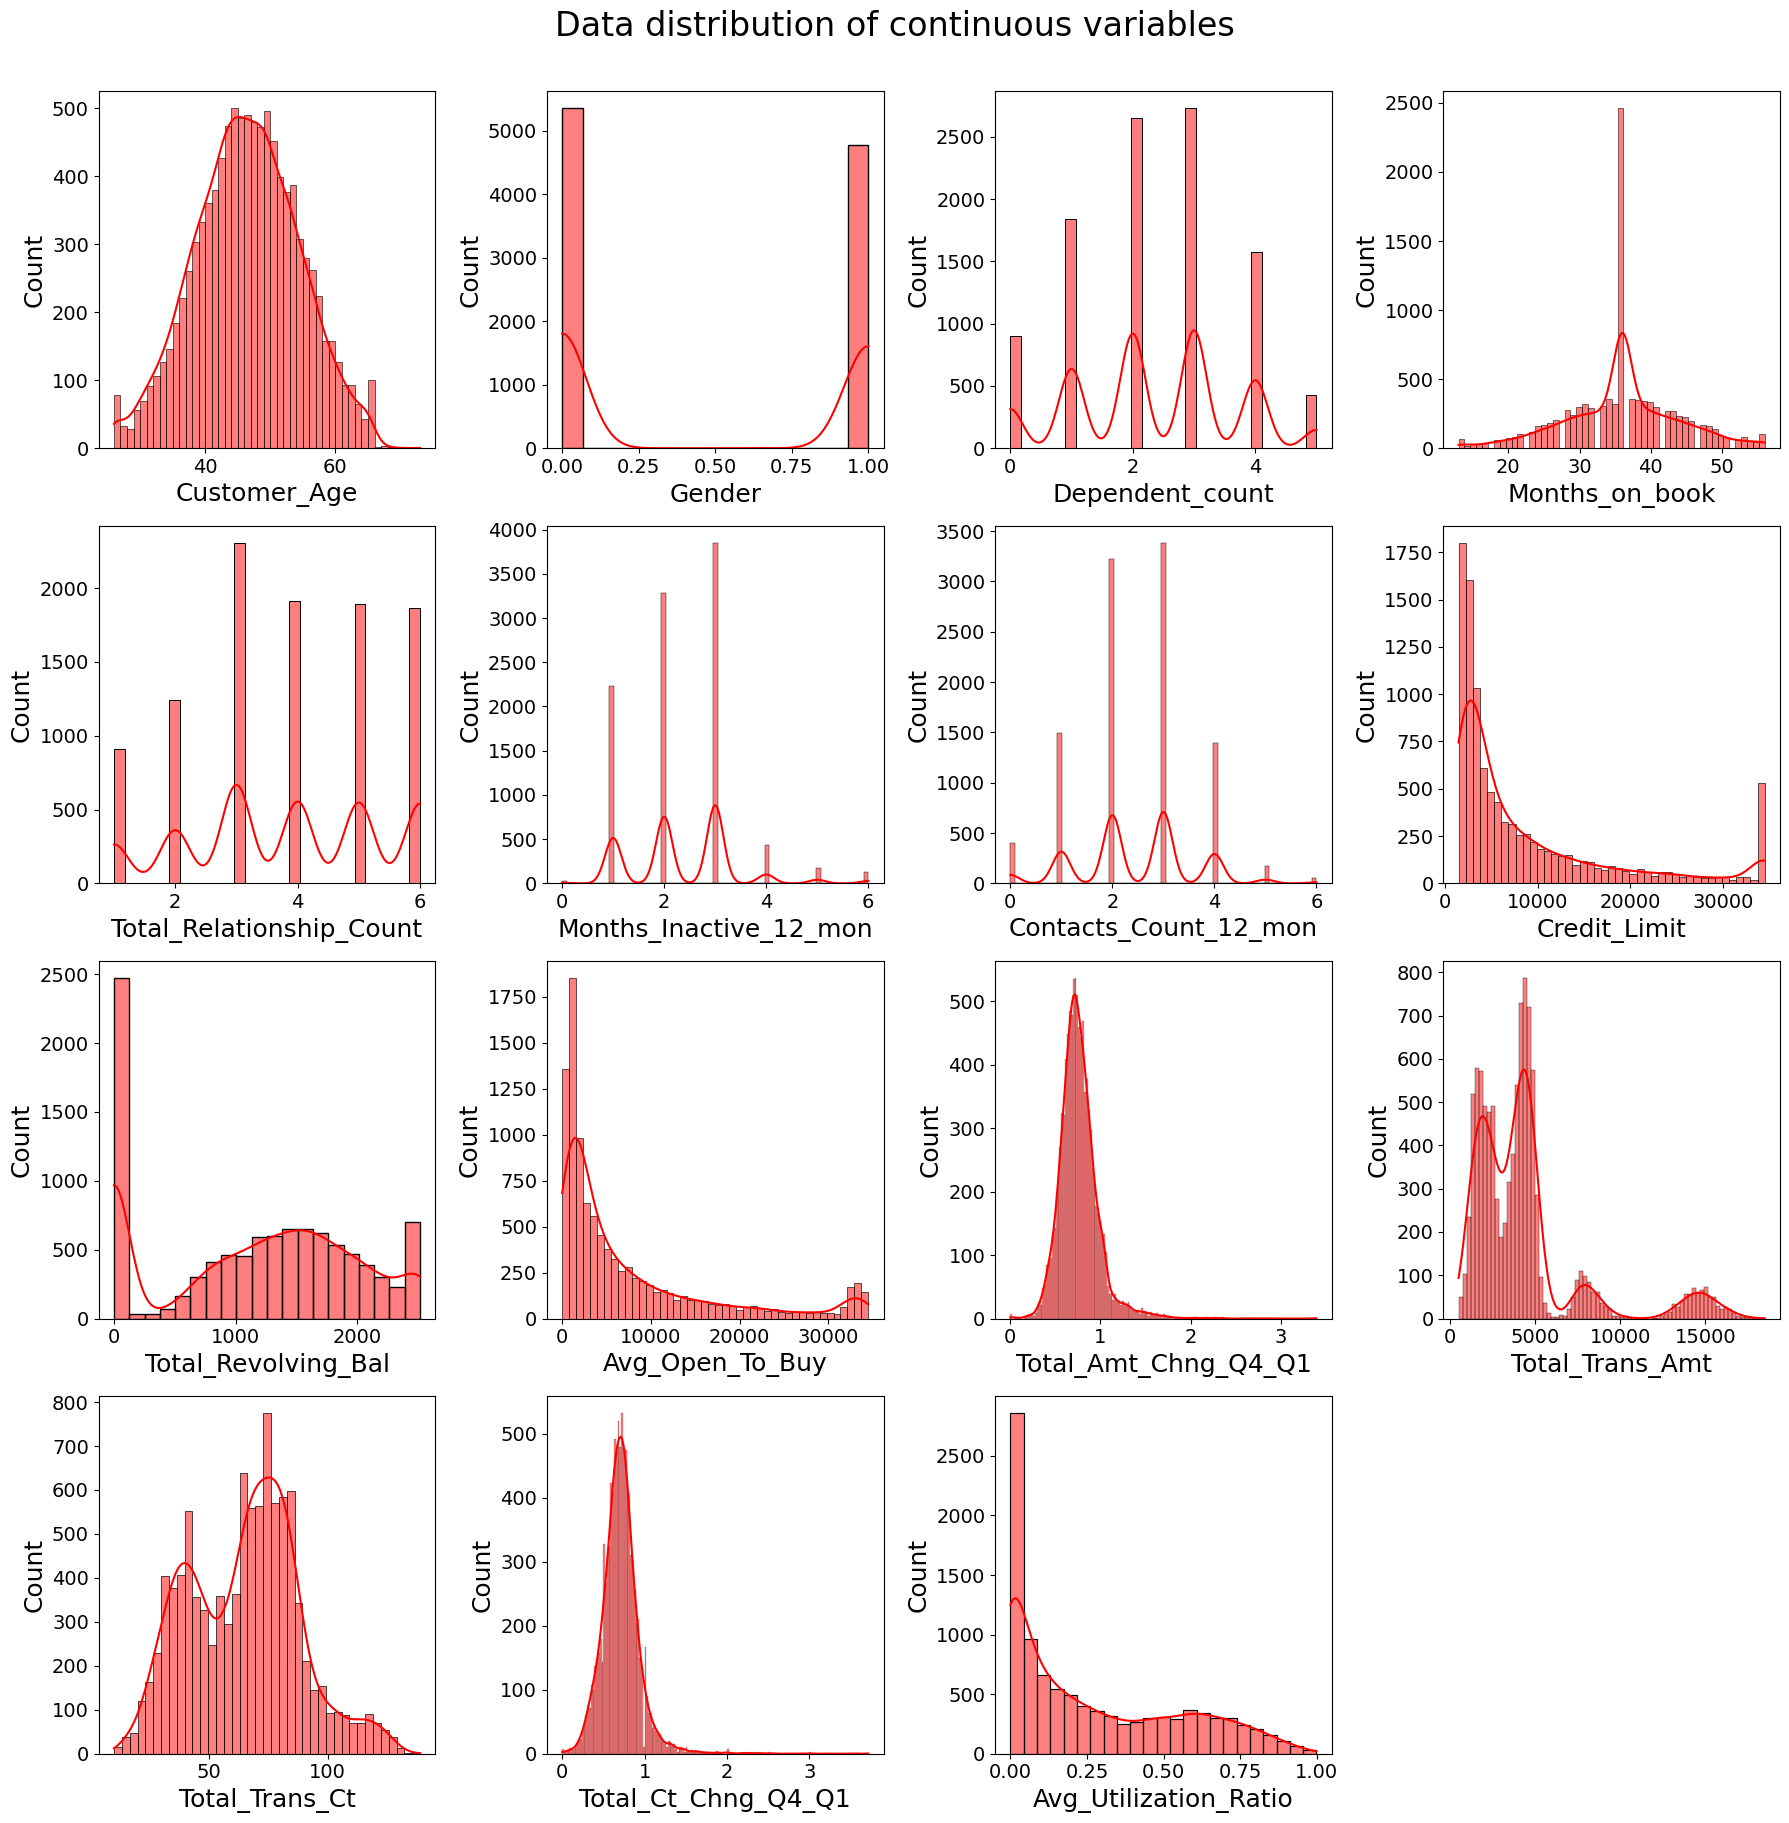

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('../cleaned_data/cleaned_data.csv')

display(data.describe())
display(data.head())


# Plotting histograms for numerical features
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.drop(['Attrition_Flag'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(4, 4, i+1)  # Creating a subplot for each column.
    sns.histplot(data=data, x=col, ax=ax, color='red', kde=True)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
plt.suptitle('Data distribution of continuous variables',fontsize=24, y=1.01)
plt.tight_layout()
plt.show()

concluded from histograms:

months on book 
total amount/ count change <1
total trans amount/count: peaks

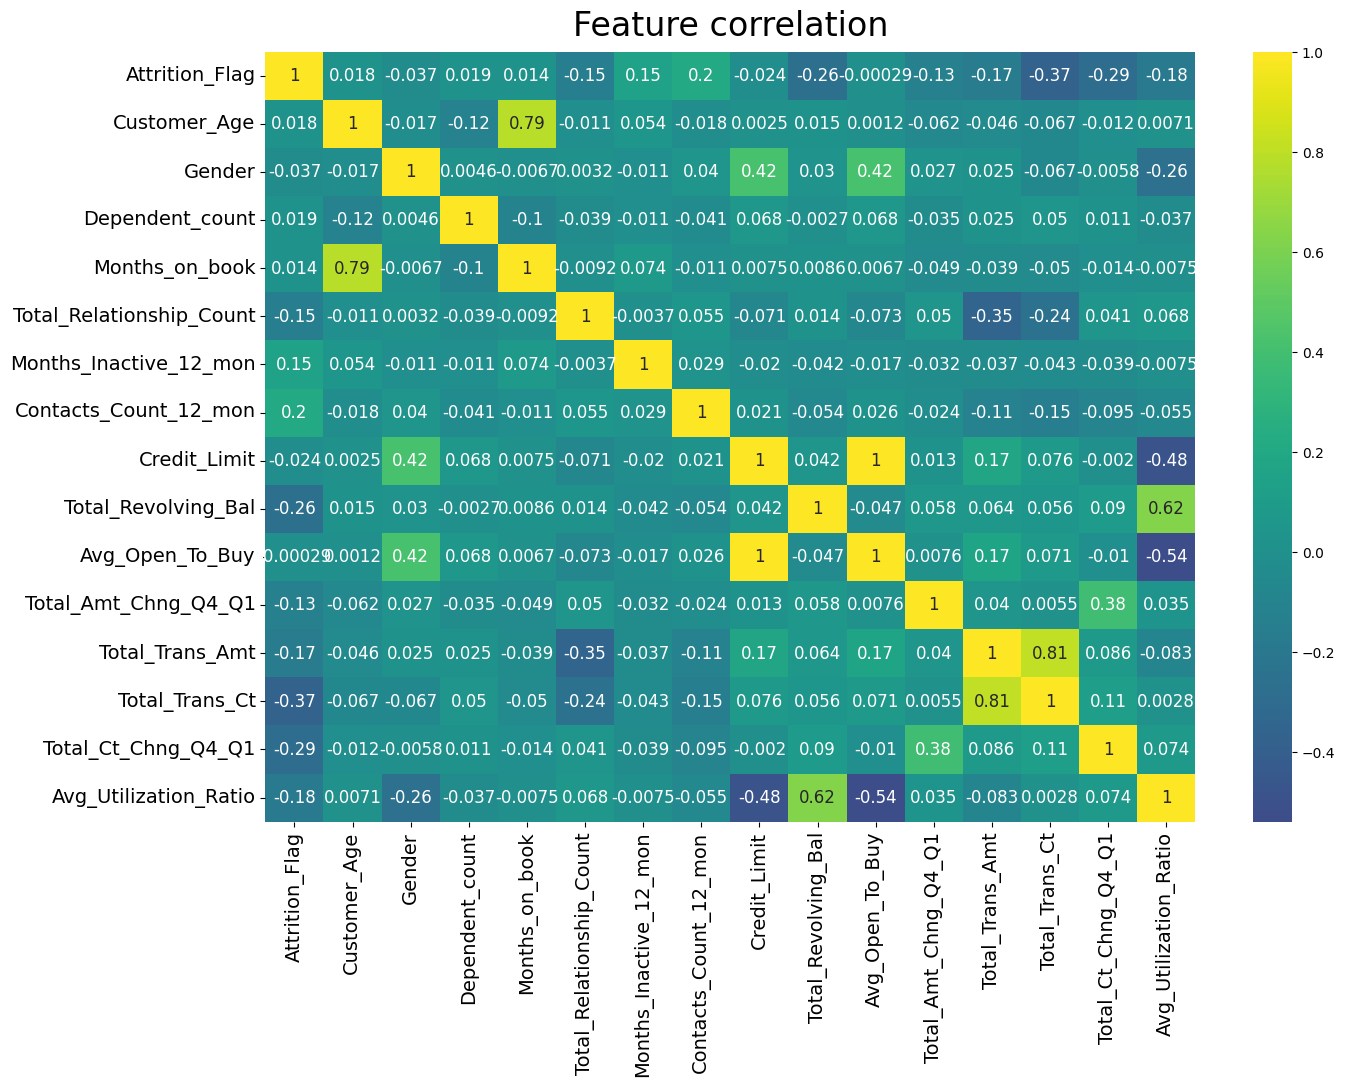

In [110]:
# Correlation between numerical features: heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Feature correlation",fontsize=24, y=1.01)
plt.show()

AVG Open to buy & credit limit: same information

high correlation between:

Total transaction amount/count

months on book - customer age

AVG Utilisation Ratio - Total Revolving Balance


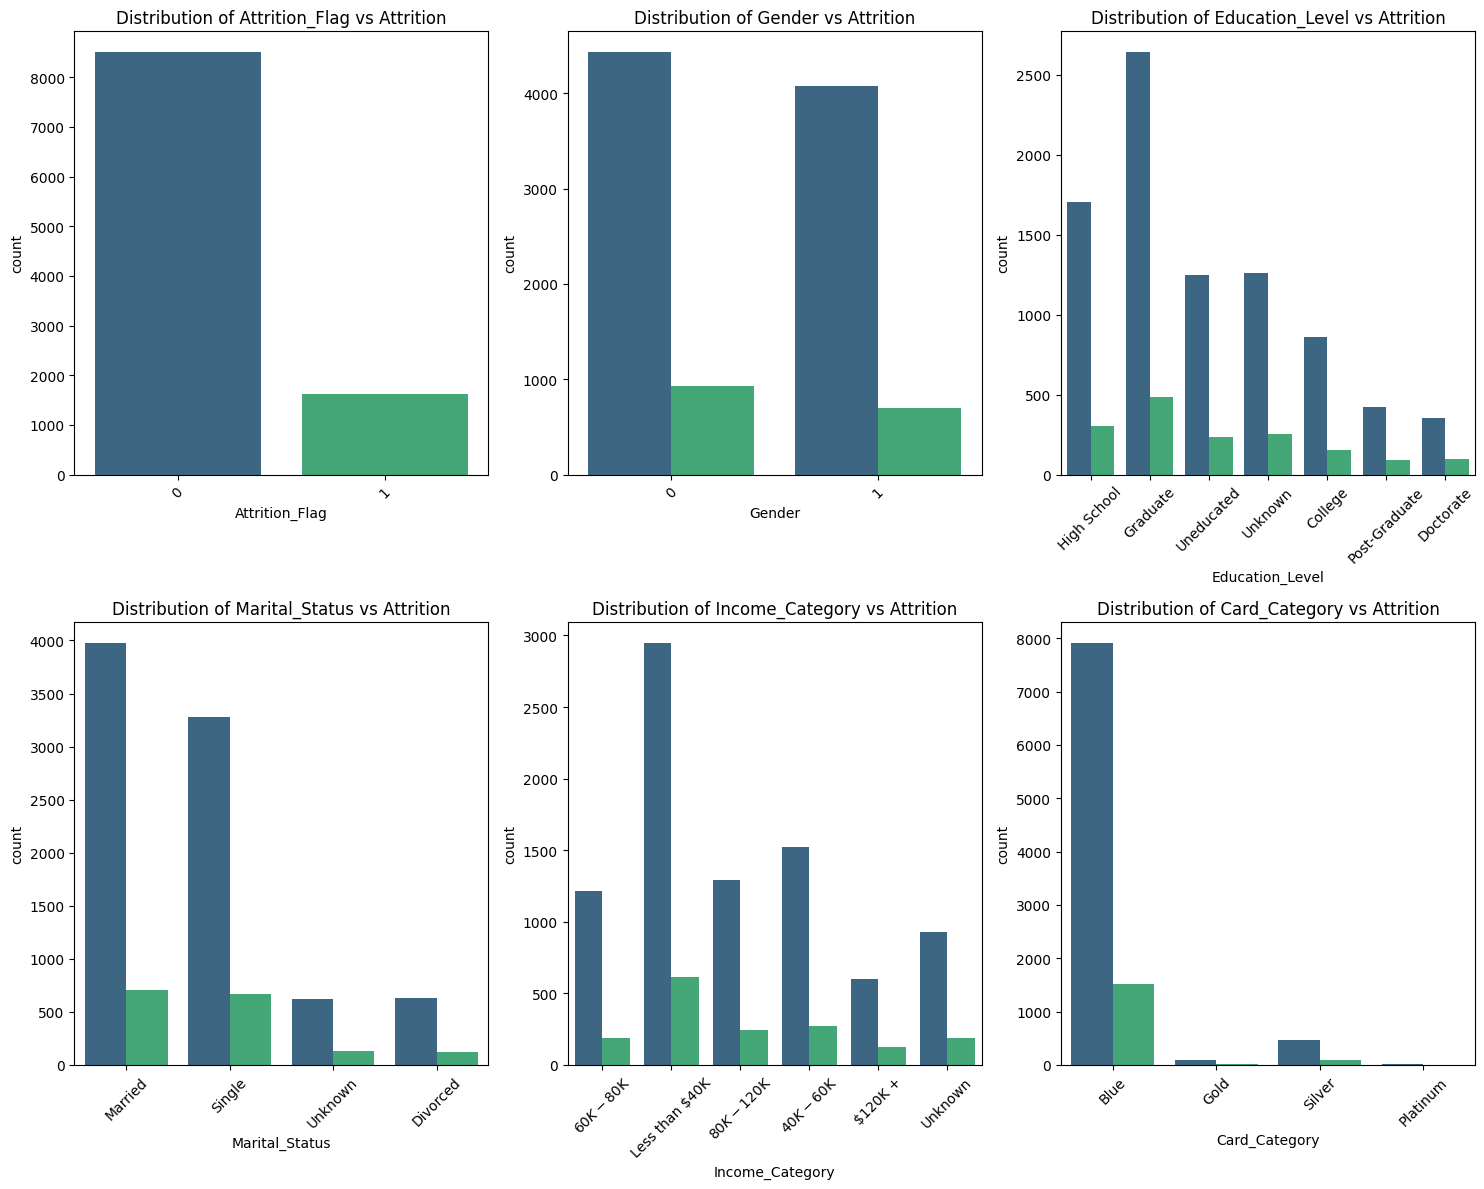

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K',
       'Unknown', 'Gold', 'Platinum', 'Silver', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Uneducated', 'Unknown', 'Married',
       'Single', 'Unknown'],
      dtype='object')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Silver,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown,Married,Single,Unknown
0,0,45,1,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,0,1,0,0
1,0,49,0,5,44,6,1,2,8256.0,864,...,0,0,1,0,0,0,0,0,1,0
2,0,51,1,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,40,0,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,0,0,1
4,0,40,1,3,21,5,1,0,4716.0,0,...,0,0,0,0,0,1,0,1,0,0


In [111]:
# Plot categorical features
columns_to_visualize = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.countplot(x=column, data=data, hue='Attrition_Flag', palette='viridis', legend=False)
    plt.title(f'Distribution of {column} vs Attrition')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Encoding ordinal features
columns = ['Income_Category','Card_Category', 'Education_Level','Marital_Status']
for col in columns:
  data = pd.concat([data,pd.get_dummies(data[col], drop_first=True).astype(int)], axis=1)
data.drop(columns=columns, inplace=True)

# Scaling
#columns = 

display(data.columns)
data.head()


maybe: attrition percentage for platinum is higher?

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Prepare and split data
X = data.drop(columns='Attrition_Flag').to_numpy()
y = data['Attrition_Flag'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize the base models
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the models for comparison
models = [
    ('XGBoost', xgb_model),
    ('Random Forest', rf_model),
    ('Voting Classifier', VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], voting='soft'))
]

# Store the model evaluation results
model_comparison = {}

# Train and evaluate models, calculate results
for model_name, classifier in models:
    # Fit the model
    classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    # Calculate score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Cross-validation
    cross_val_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="accuracy")
    cv_accuracy = cross_val_accuracy.mean()
    cv_std = cross_val_accuracy.std()
    # Accuracy
    accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
    accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
    # Print metrics
    print(f"Model: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
    print(f"Accuracy for Class 0: {accuracy_class_0 * 100:.2f}%")
    print(f"Accuracy for Class 1: {accuracy_class_1 * 100:.2f}%")

    # Add metrics to model_comparison
    model_comparison[model_name] = {
        'accuracy': accuracy,
        'accuracy_class_0': accuracy_class_0,
        'accuracy_class_1': accuracy_class_1,
        'f1_score': f1,
        'cv_accuracy': cv_accuracy,
        'cv_std': cv_std
    }
    # Print classification report
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 60)


Model: XGBoost
Model Accuracy: 96.41%
Model F1-Score: 96.40%
Cross Val Accuracy: 97.18%
Cross Val Standard Deviation: 0.33%
Accuracy for Class 0: 97.87%
Accuracy for Class 1: 89.02%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2113
           1       0.89      0.89      0.89       419

    accuracy                           0.96      2532
   macro avg       0.94      0.93      0.93      2532
weighted avg       0.96      0.96      0.96      2532

------------------------------------------------------------
Model: Random Forest
Model Accuracy: 95.10%
Model F1-Score: 94.90%
Cross Val Accuracy: 95.68%
Cross Val Standard Deviation: 0.46%
Accuracy for Class 0: 98.91%
Accuracy for Class 1: 75.89%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2113
           1       0.93      0.76      0.84       419

    accuracy                           0.95      2532
   macro avg       0.94 